# Predicting HIV Risk and Identifying Key Infection Drivers among Adolescent Girls and Young Women in Kenya (2018–2022)



## 1.0 Introduction
Human Immunodeficiency Virus (HIV) remains one of the most pressing global health challenges. Despite major advances in prevention and treatment, adolescent girls and young women (AGYW) continue to bear a disproportionate burden of new infections, especially in sub-Saharan Africa. Research shows that adolescent girls and Young women are at least twice as likely to acquire HIV compared to their male counterparts due to a mix of biological, socio-economic, and behavioral risk factors.

The SPARK program (Strengthening Prevention and Awareness for Resilient Communities) was launched to reduce HIV infections among AGYW by addressing the structural drivers of HIV risk, including poverty, gender inequality, and violence. However, evaluating its effectiveness and identifying the most at-risk individuals remains a challenge.

This project leverages data science methodologies to analyze the effectiveness of SPARKS interventions, identify patterns of risk, and evaluate program outcomes. By utilizing data from program implementation, surveys, and HIV incidence tracking, the study aims to provide insights into optimizing resource allocation, improving service delivery, and strengthening impact assessment.

## 1.1 Empirical Review
According to HIV & AIDS world outlook reports highlights HIV as the biggest global health issue with approximately 38 million infected worldwide(WHO(2020), UNAIDS(2020)).The disease mostly affects adolescent girls and young women (AGYW), who are at a higher risk of HIV infection due to a combination of biological, socio-economic, and behavioral factors (WHO(2020), UNAIDS(2019)).

Regionally, sub-Saharan Africa is bearing the bulk of the epidemic and bears nearly 70% of the world's HIV cases (WHO(2020), UNAIDS(2019)).

Locally in Kenya, HIV remains a significant public health issue among AGYW relative to their counterparts who are male. Structural impediments such as gender disparities, levels of poverty, and limited access to education and health care leave AGYW in some of the counties vulnerable to increased vulnerability (National AIDS Control Council, 2020; Ministry of Health Kenya, 2021). Despite interventions such as the Aid-Funded programs that seek to stem HIV infections by surmounting these structural drivers, the challenge of reaching high-risk groups and utilizing existing resources to the fullest for intervention still exists.This research will, therefore adopt Cross Industry Standard Procedures- Data Mining(CRISP-DM) methodology for the health industry.

## 2.0 Business Understanding
The core objective of this project is to support evidence-based decision-making in public health by analyzing SPARK'S program data. The business problem revolves around improving the targeting and effectiveness of interventions by identifying high-risk populations, measuring program reach, and assessing the correlation between intervention layering and HIV prevention outcomes.
This project leverages data science to support public health organizations, policymakers, NGOs, and the program's coordinators by providing data-driven insights to:
- Predict HIV risk among AGYW based on demographics, behavior, and intervention exposure.
- Identify key risk factors contributing to HIV vulnerability.
- Assess the effectiveness of the program's interventions in reducing HIV risk.
- Determine which interventions (biomedical, behavioral, social protection) have the most impact.

By answering these questions, we aim to improve resource allocation, intervention targeting, and HIV prevention strategies, ensuring that support reaches the most vulnerable AGYW effectively.

## 2.1 Objectives:

This project aims to:
- Develop a predictive model to estimate HIV risk among AGYW.
- Analyze key factors influencing HIV risk through feature importance techniques.
- Determine the most impactful interventions within the DREAMS framework.
- Provide actionable insights to optimize HIV prevention efforts.

## 3.0 Data Understanding
### 1. Dataset Description

The dataset used in this project contains detailed demographic, behavioral, and intervention-related information on adolescent girls and young women (AGYW) participating in the health program. The data includes key indicators such as:

- Demographic Information – Age, county, household structure, parental status.
- Socioeconomic Status – Household size, food security, income sources.
- Education & Behavior – School attendance, history of sexual activity, condom use.
- HIV Testing & Status – HIV testing history, last test result.
- DREAMS Program Participation – Interventions received (biomedical, behavioral, social protection).
- Exit Status – Whether participants continued or exited the program and the reason for exiting.

This dataset provides a comprehensive view of factors affecting HIV risk among AGYW, allowing for predictive modeling and impact evaluation.

### 2. Data Source

The dataset originates from the SPARK(Strengthening Prevention and Awareness for Resilient Communities) initiative, a global HIV prevention effort targeting adolescent girls and young women.
 
*Why this dataset is relevant:*
- It includes key HIV risk indicators (e.g., sexual activity, education, income).
- It captures intervention history (biomedical, behavioral, social protection).
- It enables predictive modeling to identify at-risk individuals and evaluate intervention effectiveness.

*How we will use this data:*
- To identify patterns & risk factors that contribute to HIV vulnerability.
- To assess the program's interventions and their impact on HIV risk.
- To develop predictive models to help in resource allocation & targeted interventions.

## 4.0 Data Cleaning

### 1. Loading Required Libraries & Dataset

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline
import summarytools as st
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Ioading the dataset
AGYW_prev_data=pd.read_csv("./data/hiv_raw_dataset.csv")
AGYW_prev_data.head() #display the first 5 rows of the dataset

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [3]:
AGYW_prev_data.info()
'''
Dataset Summary:
The dataset contains 455,807 rows and 42 columns.
It includes the following data types:
- 8 columns of type Float
- 29 columns of type Object
- 5 columns of type Integer
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   head_of_household_other            5960 non-null    object 
 5   age_of_household_head              434789 non-null  float64
 6   father_alive                       442399 non-null  object 
 7   mother_alive                       442820 non-null  object 
 8   are_both_parents_alive             455807 non-null  object 
 9   is_one_parent_alive                455807 non-null  object 
 10  parents_alive_status               390403 non-null  object 
 11  no_of_people_in_household          4486

'\nDataset Summary:\nThe dataset contains 455,807 rows and 42 columns.\nIt includes the following data types:\n- 8 columns of type Float\n- 29 columns of type Object\n- 5 columns of type Integer\n'

In [4]:
# Checking the data types,number of varibles per feature, and memory usage
st.dfSummary(AGYW_prev_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date_of_birth[object],1. 1/1/20002. 1/1/20023. 1/1/19984. 1/1/20015. 1/1/19996. 1/1/19967. 1/1/19978. 1/1/19949. 1/1/200310. 1/1/199511. other,"1,011 (0.2%)993 (0.2%)904 (0.2%)883 (0.2%)875 (0.2%)794 (0.2%)756 (0.2%)614 (0.1%)551 (0.1%)509 (0.1%)447,917 (98.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,date_of_enrollment[object],1. 12/9/20202. 12/2/20203. 12/3/20204. 8/23/20175. 12/7/20206. 8/28/20177. 12/10/20208. 12/4/20209. 12/15/202010. 8/25/201711. other,"1,795 (0.4%)1,786 (0.4%)1,723 (0.4%)1,712 (0.4%)1,707 (0.4%)1,691 (0.4%)1,683 (0.4%)1,673 (0.4%)1,671 (0.4%)1,634 (0.4%)438,732 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",1(0.0%)
3,county[object],1. Nairobi2. Kisumu3. Homabay4. Migori5. Siaya6. Mombasa7. Kiambu8. nan,"100,411 (22.0%)82,909 (18.2%)79,954 (17.5%)69,846 (15.3%)60,411 (13.3%)31,890 (7.0%)21,130 (4.6%)9,256 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADS0lEQVR4nO3dQWrbaACG4d/FlOnGJgRyGB9iDjuH8G1CiBaT0o1nMQ1kpk2b1NIrqJ5nl5W1ePmNhL54d7lcBhQ+rH0BbIfYyIiNjNjIiI2M2Mjsxhifxhg

### 2. Data Completeness

* Checking for missing values and treating them

In [5]:
#checking for missing values
missing_values=AGYW_prev_data.isna().sum().sort_values(ascending=False)
total_rows=AGYW_prev_data.shape[0]
missing_values_percentage=((missing_values/total_rows)*100).round(1)
missing_values_percentage

head_of_household_other              98.7
dreams_program_other                 98.6
exit_reason_other                    94.4
dreams_program                       89.8
used_condom_with_last_partner        53.4
age_of_last_partner                  53.4
age_at_first_sexual_encounter        50.4
has_sexual_partner                   50.4
current_school_level                 44.1
no_of_days_missed_food_in_4wks       43.7
current_income_source                28.4
exit_reason                          15.3
exit_age                             15.1
parents_alive_status                 14.3
age_of_household_head                 4.6
father_alive                          2.9
mother_alive                          2.8
head_of_household                     2.1
county                                2.0
no_of_children                        1.7
ever_had_sex                          1.7
no_of_males                           1.7
no_of_adults                          1.6
no_of_females                     

**Observations**

- Some columns have over 90% missing values, such as age_of_last_partner, used_condom_with_last_partner, and dreams_program_other.
- Important features like county (2% missing) and currently_in_school (0.9% missing) have moderate missingness.
- Household-related columns (head_of_household, no_of_people_in_household) also contain gaps.
- Columns related to sexual history (ever_had_sex, age_at_first_sexual_encounter) have high missing values averaging 50%.

In [6]:
#columns with 80% null values above
above_threshold = missing_values_percentage[missing_values_percentage > 80.0]
#print(missing_values_percentage)
print("\nColumns with missing values above 80% threshold:")
print(above_threshold)
# Drop the columns with more than 80% missing values
AGYW_prev_data= AGYW_prev_data.drop(columns=above_threshold.index)


Columns with missing values above 80% threshold:
head_of_household_other    98.7
dreams_program_other       98.6
exit_reason_other          94.4
dreams_program             89.8
dtype: float64


In [7]:
AGYW_prev_data.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'age_of_household_head', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'is_one_parent_alive', 'parents_alive_status',
       'no_of_people_in_household', 'no_of_females', 'no_of_males',
       'no_of_adults', 'no_of_children', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'ever_tested_for_hiv',
       'last_test_result', 'ever_had_sex', 'age_at_first_sexual_encounter',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age'],
      dtype='object')

In [8]:
# Filling missing values for categorical and numerical columns
numerical_cols = AGYW_prev_data.select_dtypes(include=np.number).columns
print(f'numerical columns: {numerical_cols}')
categorical_cols = AGYW_prev_data.select_dtypes(include='object').columns
print(f'categorical columns:  {categorical_cols}')

# Fill missing values
for col in AGYW_prev_data.columns:
    if col in numerical_cols:
        AGYW_prev_data[col].fillna(AGYW_prev_data[col].median(), inplace=True)  # Fill numerical columns missing values with median
    elif col in categorical_cols:
        most_frequent = AGYW_prev_data[col].mode()[0] #if not AGYW_prev_data[col].mode().empty else "Unknown"
        AGYW_prev_data[col].fillna(most_frequent, inplace=True)  # Fill categorical colums missing values with mode or "Unknown"

numerical columns: Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'age_at_first_sexual_encounter', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions', 'exit_age'],
      dtype='object')
categorical columns:  Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'father_alive', 'mother_alive', 'are_both_parents_alive',
       'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result'],
      dtype='object')


In [9]:
#confirm null vlaues again
AGYW_prev_data.isnull().sum()

date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter        0
has_sexual_partner                   0
age_of_last_partner      

In [10]:
# drop the duplicate rows
duplicates=AGYW_prev_data.duplicated().sum()
AGYW_prev_data = AGYW_prev_data.drop_duplicates()
print(f"We have dropped {duplicates} duplicate rows.")

We have dropped 105 duplicate rows.


In [11]:
#drop columns that we may not need for our analysis
columns_to_drop=['ever_tested_for_hiv',
                 'is_one_parent_alive', 'parents_alive_status', 'no_of_females',
                 'exit_age']
AGYW_prev_data=AGYW_prev_data.drop(columns=columns_to_drop)


In [12]:
# converting date columns to dateline 
date_cols= ['date_of_birth', 'date_of_enrollment','intervention_date']
for col in date_cols:
    AGYW_prev_data[col] = pd.to_datetime(AGYW_prev_data[col])

In [13]:
 #Stripping leading and trailing whitespace for categorial columns
obj_cols = AGYW_prev_data.select_dtypes(include=['object']).columns
for col in obj_cols:
    AGYW_prev_data[col] = AGYW_prev_data[col].str.strip()

In [14]:
#Standardize categorical variables that have binary responses (e.g., Yes/No)
binary_cols = ['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']
for col in binary_cols:
    if col in AGYW_prev_data.columns:
        # Convert to lower case for consistency
        AGYW_prev_data[col] = AGYW_prev_data[col].str.lower()
        # Replace common variations with standardized 'yes' or 'no'
        AGYW_prev_data[col] = AGYW_prev_data[col].replace({'yes': 'yes', 'no': 'no', 'y': 'yes', 'n': 'no'})

# print the first few rows 
AGYW_prev_data[['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school','ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']].head()

,father_alive,mother_alive,ever_missed_full_day_food_in_4wks,currently_in_school,ever_had_sex,has_sexual_partner,used_condom_with_last_partner
0,yes,yes,no,yes,no,yes,sometimes
1,yes,yes,no,yes,no,yes,sometimes
2,no,yes,yes,yes,no,yes,sometimes
3,no,yes,no,yes,no,yes,sometimes
4,yes,yes,no,yes,no,yes,sometimes


In [15]:
# Creating a new column 'year' by extracting the year from 'date_of_enrollment'
AGYW_prev_data['year_of_enrollment'] = AGYW_prev_data['date_of_enrollment'].dt.year

# Displaying the first few rows to verify the new column
AGYW_prev_data[['date_of_enrollment', 'year_of_enrollment']].head()

,date_of_enrollment,year_of_enrollment
0,2020-02-22,2020
1,2019-12-18,2019
2,2020-03-07,2020
3,2020-03-03,2020
4,2019-12-18,2019


In [16]:
# Calculate age at enrollment using the birth and enrollment dates
def calculate_age(row):
    dob = row['date_of_birth']
    doe = row['date_of_enrollment']
    # Return NaN if either date is missing
    if pd.isnull(dob) or pd.isnull(doe):
        return np.nan
    # Compute the basic difference in years
    age = doe.year - dob.year
    # Adjust if the birthday has not yet occurred in the enrollment year
    if (doe.month, doe.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to create a new column 'age_at_enrollment'
AGYW_prev_data['age_at_enrollment'] = AGYW_prev_data.apply(calculate_age, axis=1)

# Calculate the mean age (ignoring missing values)
mean_age = AGYW_prev_data['age_at_enrollment'].mean()

# Display the first few rows to verify the result
AGYW_prev_data[['date_of_birth', 'date_of_enrollment', 'age_at_enrollment']].head()

,date_of_birth,date_of_enrollment,age_at_enrollment
0,2004-09-16,2020-02-22,15
1,2004-08-02,2019-12-18,15
2,2005-10-20,2020-03-07,14
3,2006-01-18,2020-03-03,14
4,2004-03-22,2019-12-18,15


In [17]:
# Creating age groups by defining bins and labels for the age groups
bins = [5, 10, 15, 20, 25, float('inf')]
labels = ["5-9", "10-14", "15-19", "20-24", "Over 24"]

# Create the new column 'age_group' based on 'age_at_enrollment'
AGYW_prev_data['age_group'] = pd.cut(AGYW_prev_data['age_at_enrollment'], bins=bins, right=False, labels=labels)

# Display the distribution of the new age groups
age_group_distribution = AGYW_prev_data['age_group'].value_counts().sort_index()
age_group_distribution

age_group
5-9          2470
10-14       63702
15-19      228880
20-24      160564
Over 24        86
Name: count, dtype: int64

In [18]:
# Calculate median once
median_value = AGYW_prev_data['age_at_first_sexual_encounter'].median()

# Replace values greater than 25 with the median
AGYW_prev_data.loc[AGYW_prev_data['age_at_first_sexual_encounter'] > 25, 'age_at_first_sexual_encounter'] = median_value



In [19]:
#create new column called incidents to account for positives cases per category/total population
# AGYW_prev_data['Incidents'] = AGYW_prev_data['result'].apply(lambda x: 1 if x == 'Positive' else 0)


In [20]:
AGYW_prev_data.head()

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,no_of_people_in_household,no_of_males,...,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,year_of_enrollment,age_at_enrollment,age_group
0,2004-09-16,2020-02-22,Nairobi,Mother,58.0,yes,yes,Yes,6.0,3.0,...,2020-08-08,Negative,1,1,1,0,0,2020,15,15-19
1,2004-08-02,2019-12-18,Nairobi,Father,43.0,yes,yes,Yes,6.0,1.0,...,2020-04-27,Negative,1,1,1,0,0,2019,15,15-19
2,2005-10-20,2020-03-07,Nairobi,Mother,41.0,no,yes,No,5.0,1.0,...,2020-08-12,Negative,1,1,0,0,0,2020,14,10-14
3,2006-01-18,2020-03-03,Nairobi,Mother,45.0,no,yes,No,5.0,2.0,...,2020-08-12,Negative,1,1,1,0,0,2020,14,10-14
4,2004-03-22,2019-12-18,Nairobi,Father,42.0,yes,yes,Yes,5.0,1.0,...,2020-04-27,Negative,1,1,1,0,0,2019,15,15-19


### 3. Data Accuracy

* Checking for outliers

In [21]:
#Numerical columns
numerical_cols= AGYW_prev_data.select_dtypes(include=np.number).columns

#Checking for outliers using IQR (Interquartile Range) method
outliers_iqr = {}

for col in numerical_cols:
    Q1 = AGYW_prev_data[col].quantile(0.25)
    Q3 = AGYW_prev_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = AGYW_prev_data[(AGYW_prev_data[col] < lower_bound) | (AGYW_prev_data[col] > upper_bound)]
    outliers_iqr[col] = outliers.shape[0]  # Count of outliers for each column

#Checking for outliers using Z-score method
from scipy.stats import zscore

outliers_zscore = {}

for col in numerical_cols:
    # Calculate the Z-scores for each value in the column
    z_scores = zscore(AGYW_prev_data[col].dropna())
    
    # Identify outliers (Z-score > 3 or < -3)
    outliers = np.where(np.abs(z_scores) > 3)[0]
    outliers_zscore[col] = len(outliers)  # Count of outliers for each column

#Combine results
outliers_summary = pd.DataFrame({
    'Outliers (IQR)': outliers_iqr,
    'Outliers (Z-score)': outliers_zscore
})

print(outliers_summary)

                               Outliers (IQR)  Outliers (Z-score)
age_of_household_head                    7294                   9
no_of_people_in_household                8965                 551
no_of_males                              6145                1214
no_of_adults                            30995                6042
no_of_children                          14993                 410
age_at_first_sexual_encounter          189644                5281
bio_medical                              4275                4275
social_protection                        5422                5422
behavioral                              53642                   0
post_gbv_care                           88129                   0
other_interventions                     27852               27852
year_of_enrollment                          0                   0
age_at_enrollment                           0                   0


In [22]:
# Define the list of columns to handle (excluding 'age_at_first_sexual_encounter')
columns_to_handle = [
    'age_of_household_head', 
    'no_of_people_in_household',  
    'no_of_males', 
    'no_of_adults', 
    'no_of_children', 
    'bio_medical', 
    'social_protection', 
    'behavioral', 
    'other_interventions',
    
]

# Handling outliers by replacing them with the median value
def handle_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Using boolean masking to replace outliers with the median
        median_value = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

    return df

# Handle the outliers by replacing them with median values
AGYW_prev_data = handle_outliers_with_median(AGYW_prev_data, columns_to_handle)

# Optional: Check the cleaned DataFrame
AGYW_prev_data.describe().T

,count,mean,min,25%,50%,75%,max,std
date_of_birth,455702,2001-03-10 23:18:41.959526016,1990-06-01 00:00:00,1998-07-01 00:00:00,2001-04-01 00:00:00,2003-11-29 00:00:00,2013-12-05 00:00:00,NaN
date_of_enrollment,455702,2019-08-12 23:40:55.209764864,2015-10-01 00:00:00,2017-09-15 00:00:00,2020-01-24 00:00:00,2021-01-20 00:00:00,2023-11-28 00:00:00,NaN
age_of_household_head,455702.0,42.022552,10.0,34.0,42.0,50.0,74.0,11.619095
no_of_people_in_household,455702.0,5.600485,0.0,4.0,6.0,7.0,11.0,2.104036
no_of_males,455702.0,2.34638,0.0,1.0,2.0,3.0,6.0,1.355621
no_of_adults,455702.0,2.230688,1.0,2.0,2.0,3.0,4.0,0.790926
no_of_children,455702.0,3.052679,0.0,2.0,3.0,4.0,7.0,1.718698
age_at_first_sexual_encounter,455702.0,16.775382,0.0,17.0,17.0,17.0,25.0,1.853323
intervention_date,455702,2020-09-09 07:52:50.435064832,2011-10-21 00:00:00,2019-06-12 00:00:00,2020-11-25 00:00:00,2021-12-19 00:00:00,2023-12-14 00:00:00,NaN
bio_medical,455702.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### 4. Data consistency
Consistency is achieved through removal of duplicates in the dataframe

In [23]:
#Check for duplicates
print(f'There are total of {AGYW_prev_data.duplicated().sum()} duplicates in the dataframe')

There are total of 13 duplicates in the dataframe


In [24]:
#Drop duplicates
AGYW_prev_data = AGYW_prev_data.drop_duplicates()

In [25]:
AGYW_prev_data.duplicated().sum()

0

### 5. Data Uniformity

In [26]:
#Remove white spaces in column names and change to lower case
AGYW_prev_data.columns = AGYW_prev_data.columns.str.strip().str.lower().str.replace(" ", "_")

In [27]:
AGYW_prev_data.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'age_of_household_head', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner', 'exit_status',
       'exit_reason', 'intervention_name', 'intervention_date', 'result',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'year_of_enrollment', 'age_at_enrollment',
       'age_group'],
      dtype='object')

### 6. Save Clean Dataset

In [28]:
#Make copy of cleaned dataset
agyw_df = AGYW_prev_data.copy()

## 5.0 Exploratory Data Analysis (EDA)
##### 2.1 Visualizing the Distribution of the Target Variable 'result'

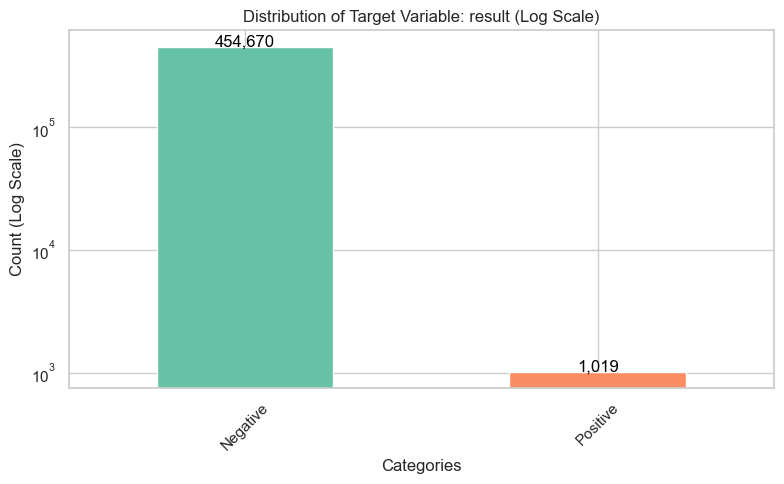

In [29]:
# Extract the 'result' column from the DataFrame
result = agyw_df['result']

# Generate a color palette from Seaborn's 'Set2' palette
palette = sns.color_palette('Set2', n_colors=len(result.value_counts()))

# Visualize the distribution with a logarithmic y-axis
plt.figure(figsize=(8, 5))
ax = result.value_counts().plot(kind='bar', color=palette)  # Use the Seaborn palette

# Use logarithmic scale for better visibility of both categories
plt.yscale('log')

# Title and labels
plt.title('Distribution of Target Variable: result (Log Scale)')
plt.xlabel('Categories')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)

# Annotate the bars with the count values, formatted with commas
for index, value in enumerate(result.value_counts()):
    plt.text(index, value + 2, f'{value:,}', ha='center', color='black')  # Format with commas

plt.tight_layout()
plt.show()



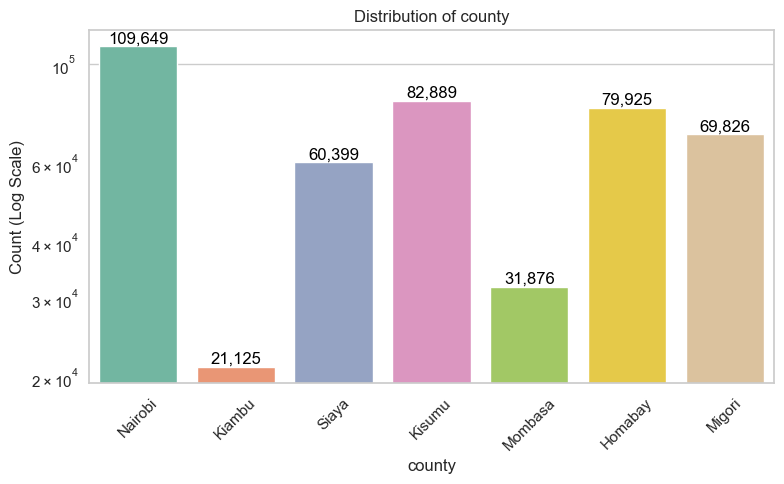

In [30]:

def visualize_univariate_analysis(df, cat_variable):
    """
    Visualizes the distribution of a categorical variable.
    Annotates the bars with the count values for clarity, using logarithmic scale and comma formatting.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cat_variable (str): The categorical variable to analyze.
    
    Returns:
    None: Displays the plot.
    """
    # Strip any leading/trailing spaces in column names
    df.columns = df.columns.str.strip()
    
    # Check if the categorical variable exists in the DataFrame
    if cat_variable not in df.columns:
        print(f"Warning: {cat_variable} does not exist in the DataFrame.")
        return

    # Visualize the distribution of the categorical variable
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=cat_variable, data=df, palette='Set2')

    # Set logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Add the count at the end of each bar with comma formatting
    for p in ax.patches:
        height = p.get_height()
        # Annotating the bar with count formatted with commas
        ax.text(p.get_x() + p.get_width() / 2, height + 2,
                f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')  # Formatting text

    # Customize the plot
    plt.title(f'Distribution of {cat_variable}')
    plt.xlabel(cat_variable)
    plt.ylabel('Count (Log Scale)')
    
    # Rotate x-axis ticks by 45 degrees
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with agyw_df and 'county' as the categorical variable
visualize_univariate_analysis(agyw_df, 'county')

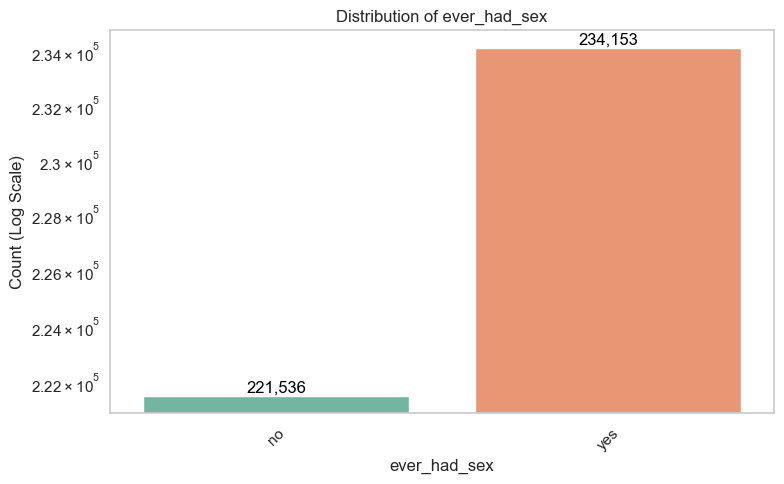

In [31]:
# Call the function with agyw_df and 'county' as the categorical variable
visualize_univariate_analysis(agyw_df, 'ever_had_sex')

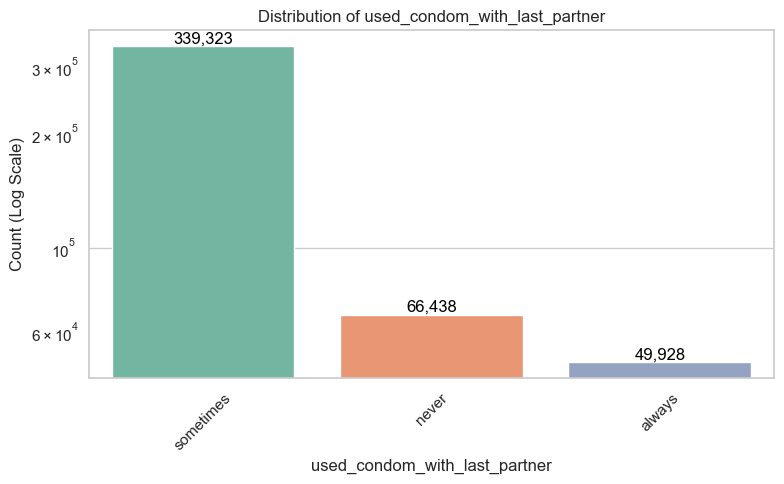

In [32]:
#Use of condom with the last partner
# Call the function with agyw_df and 'county' as the categorical variable
visualize_univariate_analysis(agyw_df, 'used_condom_with_last_partner')

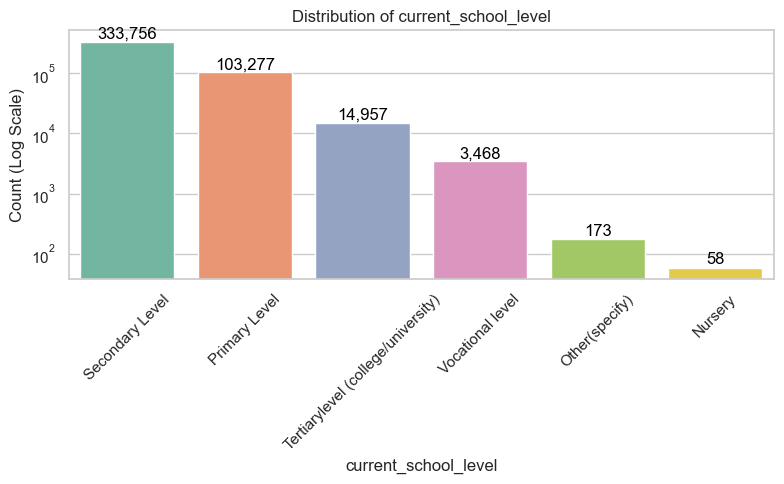

In [33]:
# Call the function with agyw_df and 'county' as the categorical variable
visualize_univariate_analysis(agyw_df, 'current_school_level')

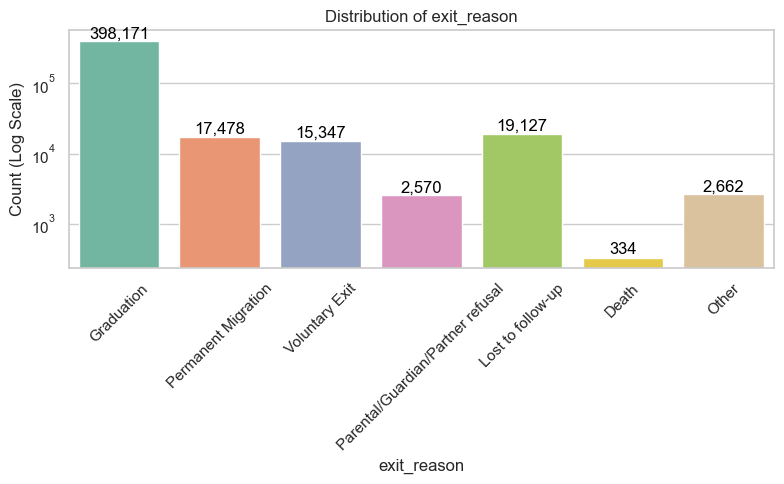

In [34]:
# Call the function with agyw_df and 'county' as the categorical variable
visualize_univariate_analysis(agyw_df, 'exit_reason')

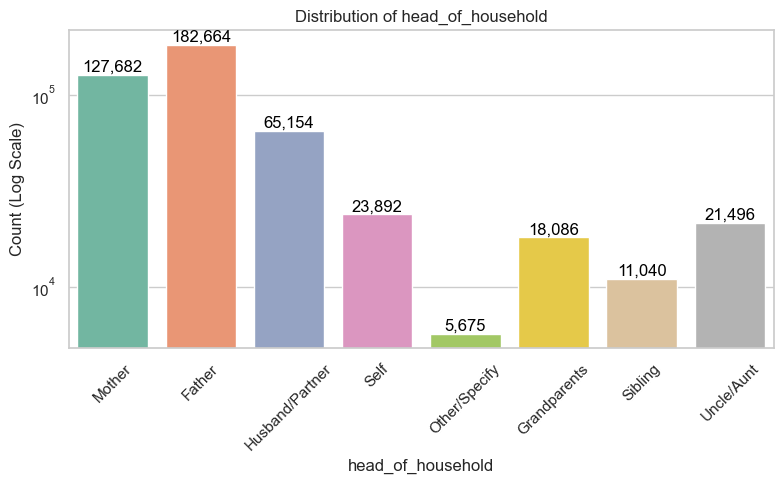

In [35]:
# Call the function with agyw_df and 'county' as the categorical variable
visualize_univariate_analysis(agyw_df, 'head_of_household')

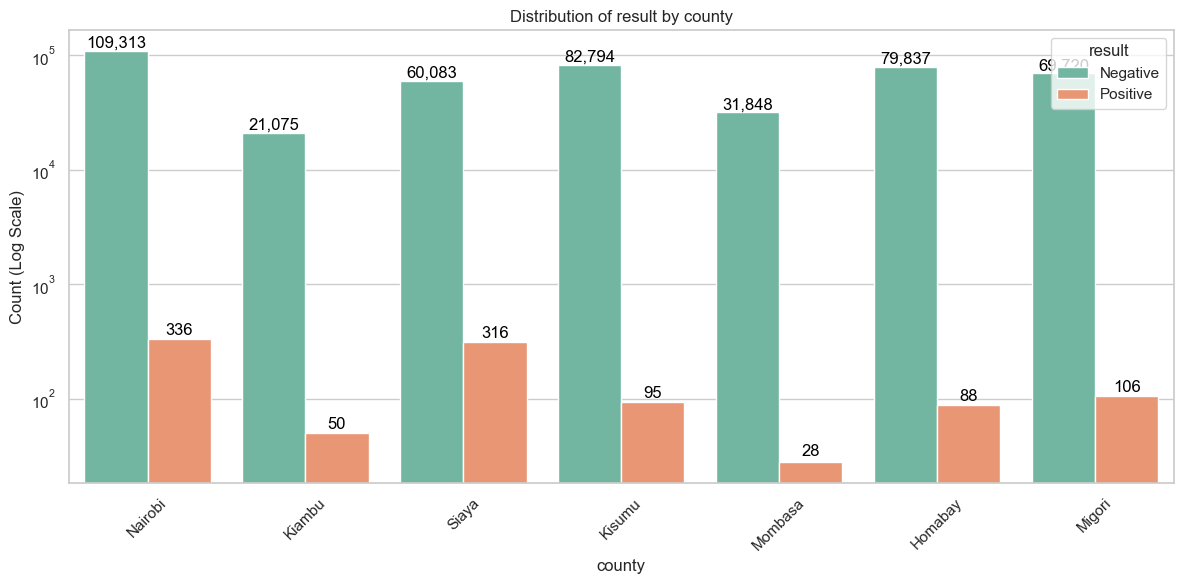

In [36]:
#BIVARIATE ANALYSIS
def visualize_result_by_category(df, cat_variable, target_col='result'):
    """
    Visualizes the distribution of the 'result' column against a categorical variable.
    Annotates the bars with the count values for clarity, using logarithmic scale and comma formatting.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cat_variable (str): The categorical variable to compare 'result' against.
    target_col (str): The column representing the target variable, default is 'result'.
    
    Returns:
    None: Displays the plot.
    """
    # Strip any leading/trailing spaces in column names
    df.columns = df.columns.str.strip()
    
    # Check if the target column exists in the DataFrame
    if target_col not in df.columns:
        print(f"Warning: {target_col} does not exist in the DataFrame.")
        return

    # Visualize the distribution of 'result' by the categorical variable
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=cat_variable, hue=target_col, data=df, palette='Set2')

    # Set logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Add the count at the end of each bar with comma formatting
    for p in ax.patches:
        height = p.get_height()
        # Annotating the bar with count formatted with commas
        ax.text(p.get_x() + p.get_width() / 2, height + 2,
                f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')  # Formatting text

    # Customize the plot
    plt.title(f'Distribution of {target_col} by {cat_variable}')
    plt.xlabel(cat_variable)
    plt.ylabel('Count (Log Scale)')
    
    # Rotate x-axis ticks by 45 degrees
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with agyw_df and 'county' as the categorical variable
visualize_result_by_category(agyw_df, 'county')


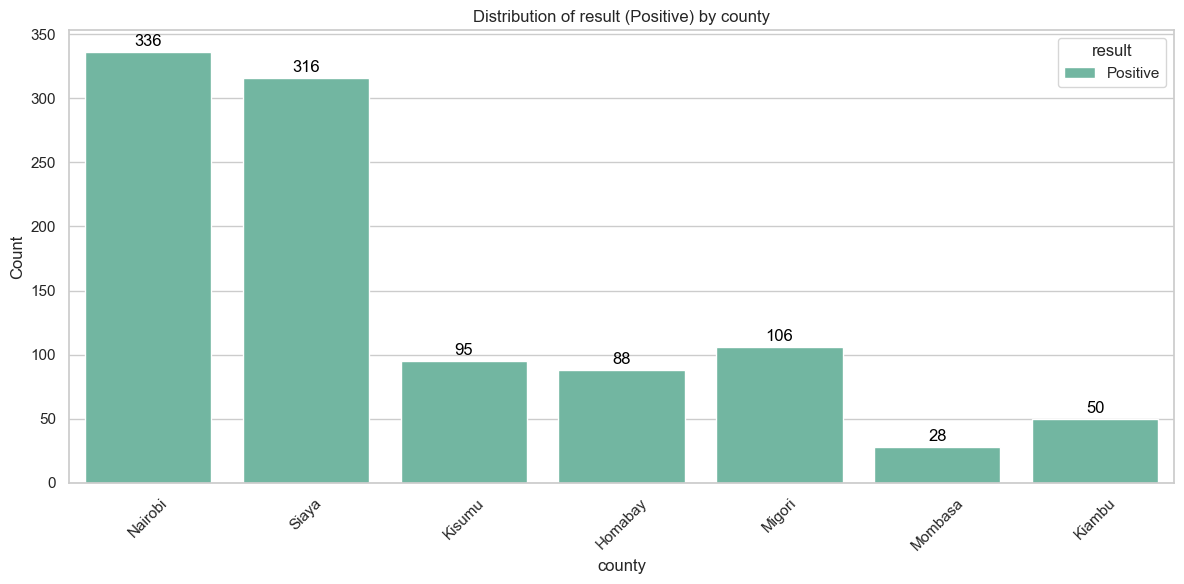

In [37]:
#Distribution of positive cases per county
def visualize_result_by_category(df, cat_variable, target_col='result'):
    """
    Visualizes the distribution of the 'result' column (only 'Positive') against a categorical variable.
    Annotates the bars with the count values, formatted with commas.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cat_variable (str): The categorical variable to compare 'result' against.
    target_col (str): The column representing the target variable, default is 'result'.
    
    Returns:
    None: Displays the plot.
    """
    # Strip any leading/trailing spaces in column names
    df.columns = df.columns.str.strip()
    
    # Check if the target column exists in the DataFrame
    if target_col not in df.columns:
        print(f"Warning: {target_col} does not exist in the DataFrame.")
        return

    # Filter the DataFrame to only include rows where the target column 'result' is 'Positive'
    df_filtered = df[df[target_col] == 'Positive']
    
    # Visualize the distribution of 'result' by the categorical variable
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=cat_variable, hue=target_col, data=df_filtered, palette='Set2')

    # Add the count at the end of each bar with comma formatting
    for p in ax.patches:
        height = p.get_height()
        # Annotating the bar with count formatted with commas
        ax.text(p.get_x() + p.get_width() / 2, height + 2,
                f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')  # Formatting text

    # Customize the plot
    plt.title(f'Distribution of {target_col} (Positive) by {cat_variable}')
    plt.xlabel(cat_variable)
    plt.ylabel('Count')
    
    # Rotate x-axis ticks by 45 degrees
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with agyw_df and 'county' as the categorical variable
visualize_result_by_category(agyw_df, 'county')



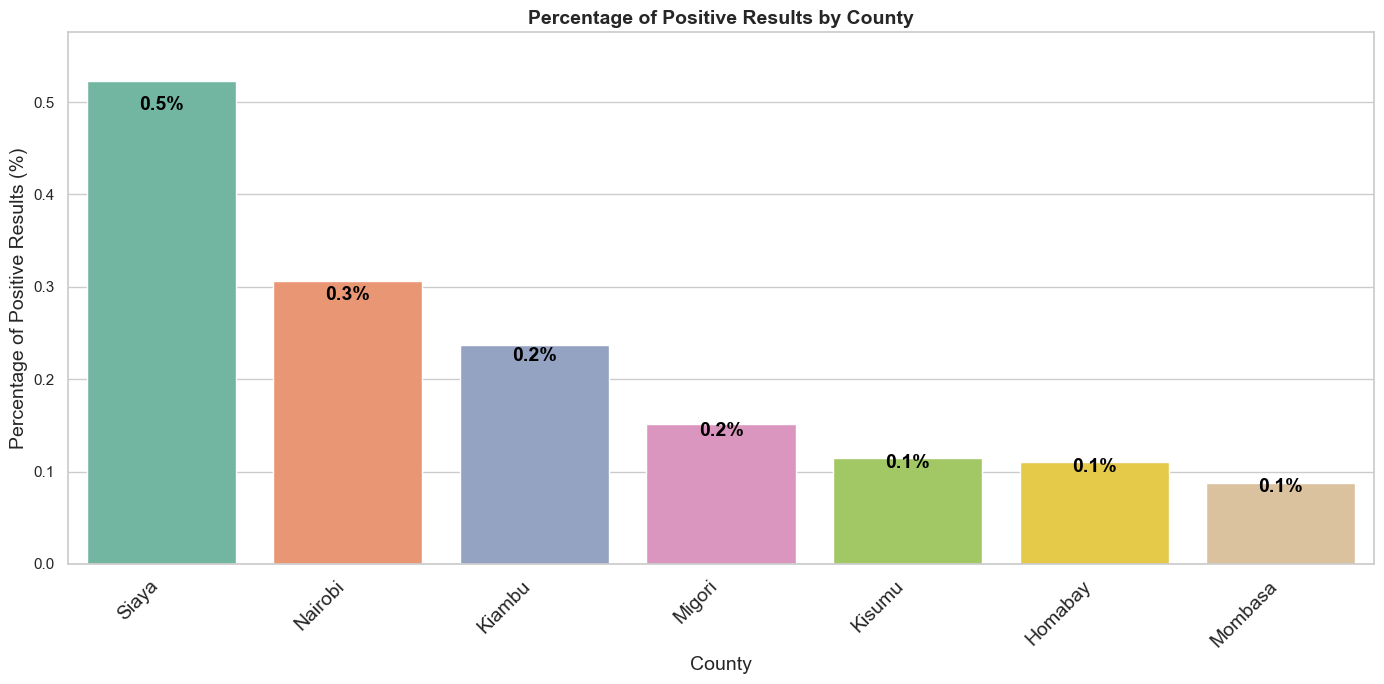

In [38]:
# Strip any leading/trailing spaces in column names
agyw_df.columns = agyw_df.columns.str.strip()

# Filter the DataFrame to only include rows where 'result' is 'Positive' or 'Negative'
df_filtered = agyw_df[agyw_df['result'].isin(['Positive', 'Negative'])]

# Perform value_counts on the 'result' column, grouped by 'county'
count_data = df_filtered.groupby('county')['result'].value_counts().unstack().fillna(0)

# Check if 'Positive' column exists (in case no 'Positive' values are found)
if 'Positive' in count_data:
    # Calculate the percentage of 'Positive' for each county
    count_data['Positive_Percentage'] = (count_data['Positive'] / count_data.sum(axis=1)) * 100

    # Reset index for plotting
    count_data = count_data.reset_index()

    # **Sort by Positive Percentage in descending order**
    count_data = count_data.sort_values(by='Positive_Percentage', ascending=False)

    # Create the bar plot with improved settings
    plt.figure(figsize=(14, 7))  # Slightly wider for clarity
    ax = sns.barplot(x='county', y='Positive_Percentage', data=count_data, palette='Set2')

    # Add percentage labels on top of the bars with better positioning
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            ax.text(p.get_x() + p.get_width() / 2, height * 0.95,  # Lowered the text position
                    f'{height:.1f}%', ha='center', va='center', 
                    fontsize=14, color='black', fontweight='bold')

    # Customize the plot
    plt.title('Percentage of Positive Results by County', fontsize=14, fontweight='bold')
    plt.xlabel('County', fontsize=14)
    plt.ylabel('Percentage of Positive Results (%)', fontsize=14)

    # Rotate x-axis labels for readability and adjust label size
    plt.xticks(rotation=45, ha='right', fontsize=14)

    # Increase y-axis limit slightly for spacing
    plt.ylim(0, count_data['Positive_Percentage'].max() * 1.1)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No 'Positive' values found for counties.")

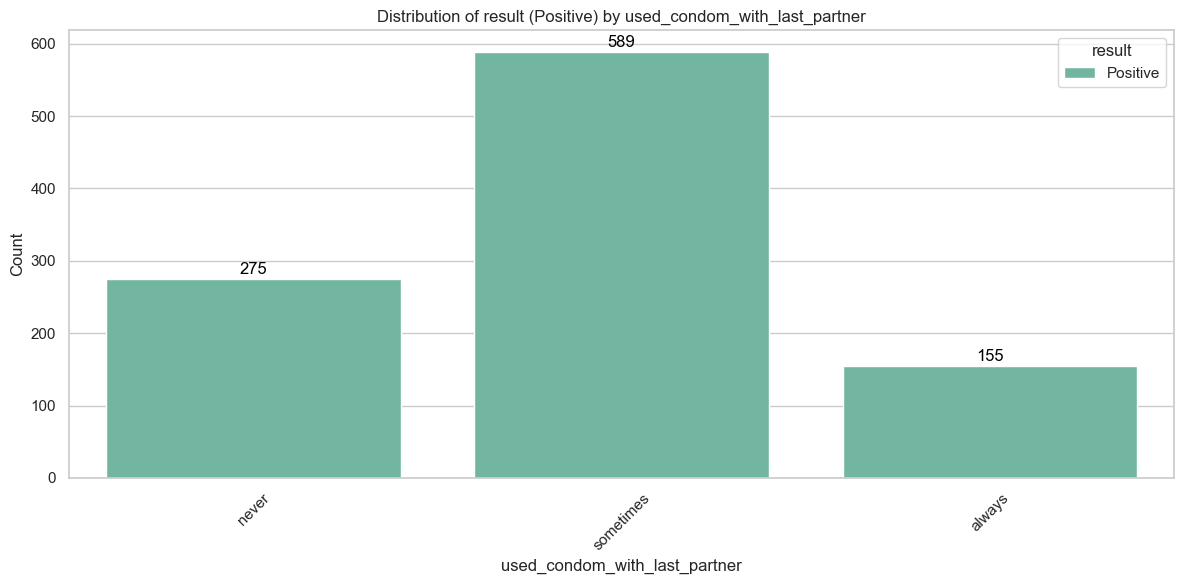

In [39]:
visualize_result_by_category(agyw_df, 'used_condom_with_last_partner')

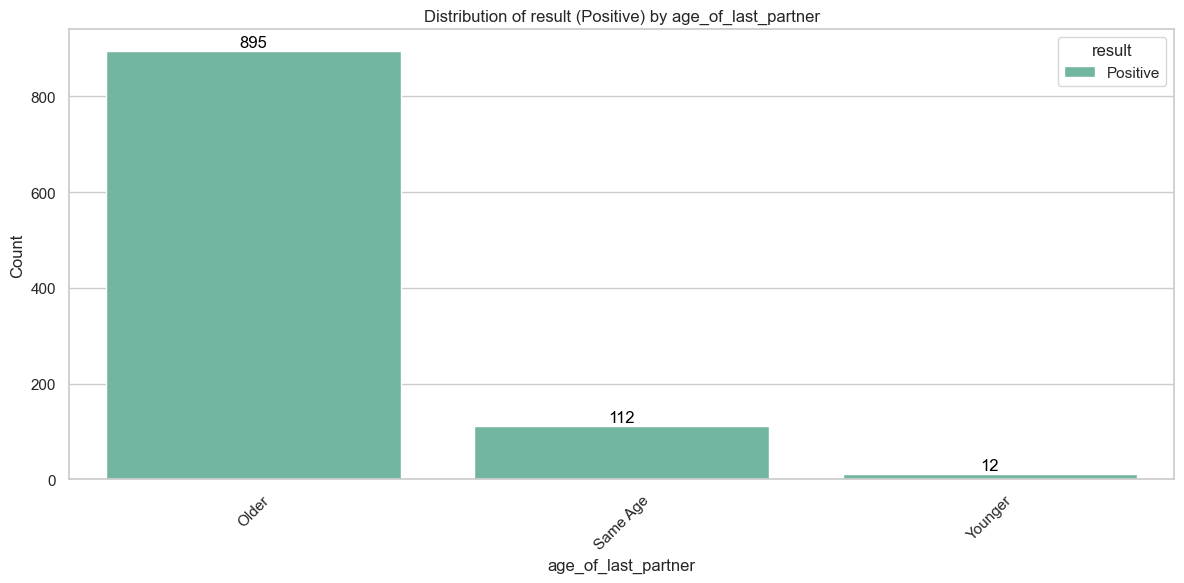

In [40]:
visualize_result_by_category(agyw_df, 'age_of_last_partner')

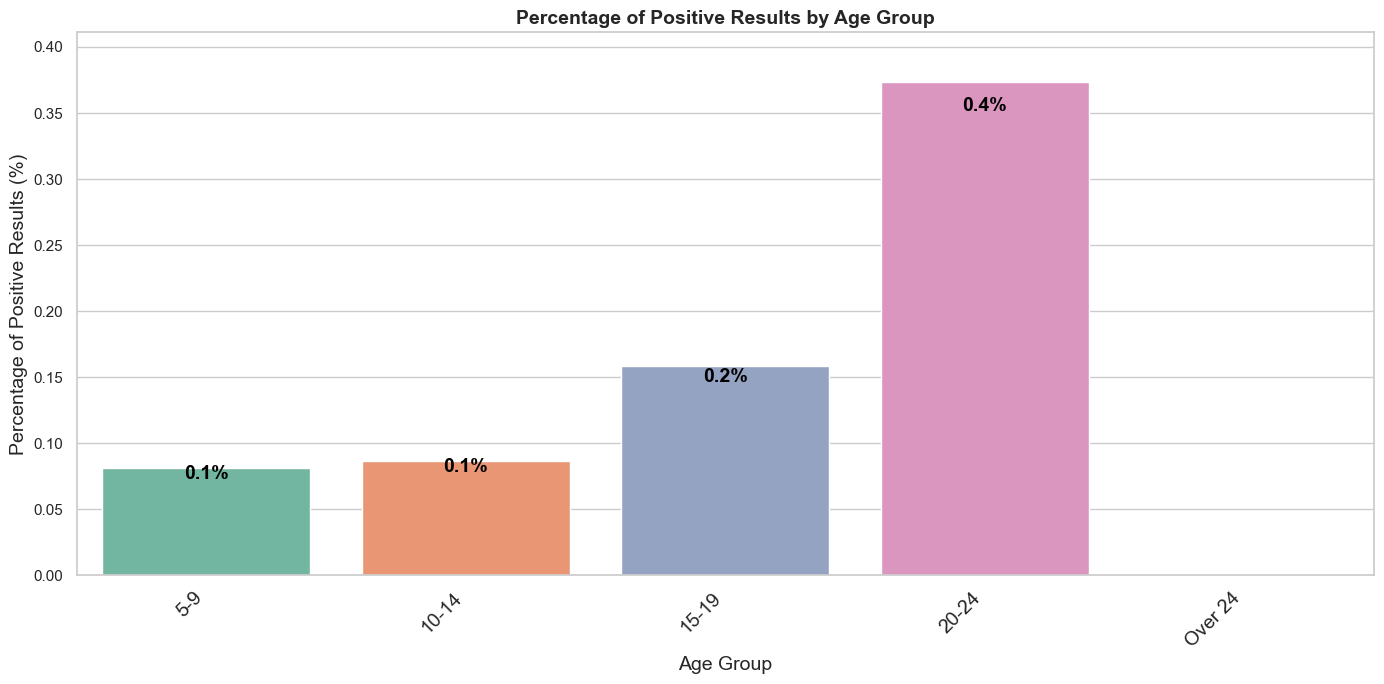

In [41]:
# Strip any leading/trailing spaces in column names
agyw_df.columns = agyw_df.columns.str.strip()

# Filter the DataFrame to only include rows where 'result' is 'Positive' or 'Negative'
df_filtered = agyw_df[agyw_df['result'].isin(['Positive', 'Negative'])]

# Perform value_counts on the 'result' column, grouped by 'age_group'
count_data = df_filtered.groupby('age_group')['result'].value_counts().unstack().fillna(0)

# Check if 'Positive' column exists (in case no 'Positive' values are found)
if 'Positive' in count_data:
    # Calculate the percentage of 'Positive' for each age group
    count_data['Positive_Percentage'] = (count_data['Positive'] / count_data.sum(axis=1)) * 100

    # Reset index for plotting
    count_data = count_data.reset_index()

    # **Sort by Positive Percentage in descending order**
    count_data = count_data.sort_values(by='Positive_Percentage', ascending=False)

    # Create the bar plot with improved settings
    plt.figure(figsize=(14, 7))  # Slightly wider for clarity
    ax = sns.barplot(x='age_group', y='Positive_Percentage', data=count_data, palette='Set2')

    # Add percentage labels on top of the bars with better positioning
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            ax.text(p.get_x() + p.get_width() / 2, height * 0.95,  # Lowered the text position
                    f'{height:.1f}%', ha='center', va='center', 
                    fontsize=14, color='black', fontweight='bold')

    # Customize the plot
    plt.title('Percentage of Positive Results by Age Group', fontsize=14, fontweight='bold')
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Percentage of Positive Results (%)', fontsize=14)

    # Rotate x-axis labels for readability and adjust label size
    plt.xticks(rotation=45, ha='right', fontsize=14)

    # Increase y-axis limit slightly for spacing
    plt.ylim(0, count_data['Positive_Percentage'].max() * 1.1)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No 'Positive' values found for age groups.")


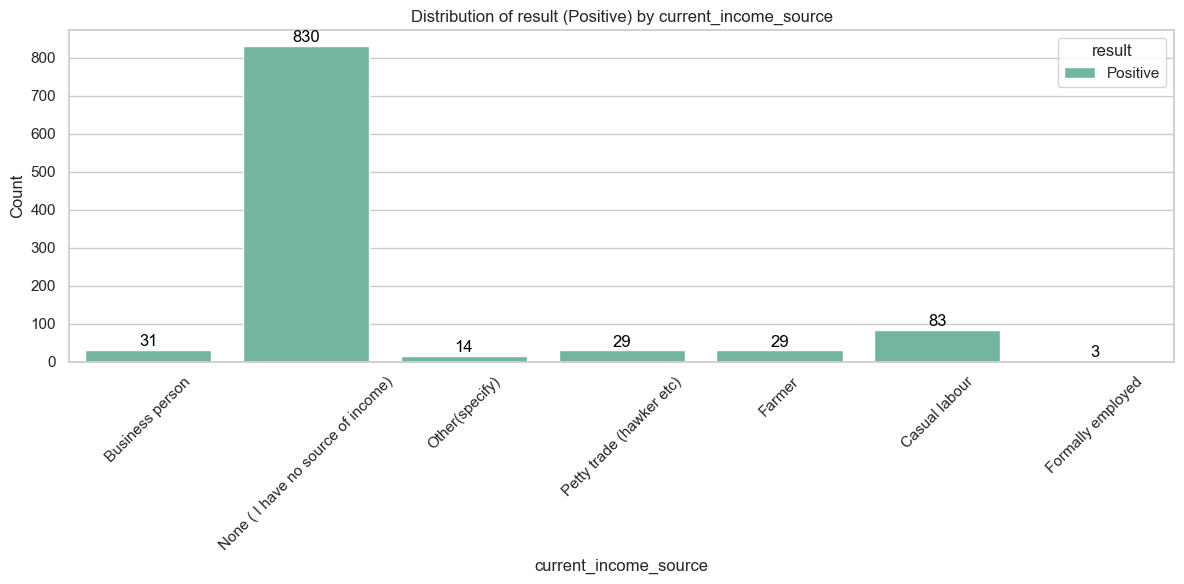

In [42]:
visualize_result_by_category(agyw_df, 'current_income_source')

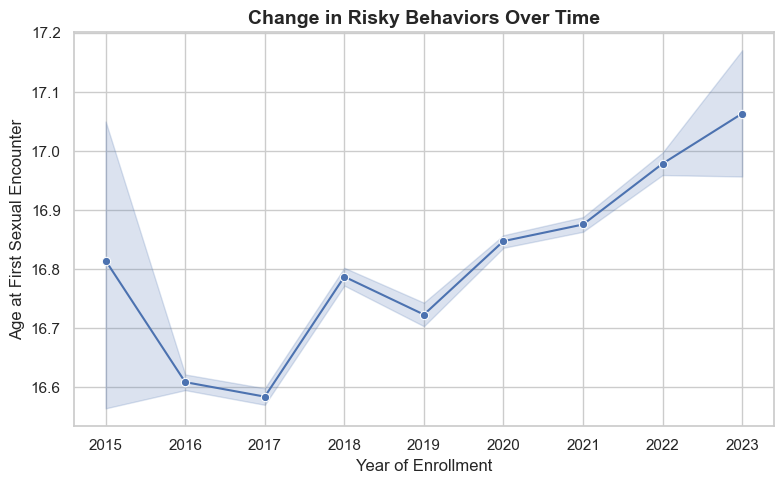

In [43]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=agyw_df, x='year_of_enrollment', y='age_at_first_sexual_encounter', 
                  marker='o', color='b')  # Use a single color instead of palette

# Customize labels and title
plt.xlabel('Year of Enrollment', fontsize=12)
plt.ylabel('Age at First Sexual Encounter', fontsize=12)
plt.title('Change in Risky Behaviors Over Time', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()




## 6.0 Modelling

## 6.1 Baseline Models

### 6.1.1 Vanila Logistic Regression Model

In [44]:
clean_df=agyw_df.drop_duplicates()
#df = clean_df.drop(columns=['date_of_birth','date_of_enrollment','intervention_date','age_group'],axis=1)

In [45]:
#target and predictors
X = clean_df.drop(['result'], axis=1)
y = clean_df['result'].map({'Negative':0, 'Positive':1})

In [46]:
#train and test splits
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [47]:
#separate categorical and numerical features
num_cols = X.select_dtypes(include=('int64', 'float64')).columns
cat_cols = X.select_dtypes(include='object').columns

In [48]:
# Preprocessing pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
      
    ('ohe', OneHotEncoder(handle_unknown='ignore')) 
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ])

In [49]:
#Baseline model as logistic regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [50]:
#Fit baseline model
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'age_at_first_sexual_encounter',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enr...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name'],
      dtype='object'))])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [51]:
#Make predictions
y_pred = lr_model.predict(X_test)

In [52]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 71.25%
Precision: 0.49%
Recall: 64.18%
F1 Score: 0.98%


### Observation
* Classifier is heavily biased towards dominant class(negative class), hence very poor balance between precision and recall as indicated by low F1 score.



### 6.1.2 Vanila Random forest model

In [53]:
#Baseline Random Forest Model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

In [54]:
#Fit RandomForest model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'age_at_first_sexual_encounter',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enr...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [55]:
#Make predictions
y_pred_rf = rf_model.predict(X_test)

In [56]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f'Accuracy: {rf_accuracy*100:.2f}%')
print(f"Precision: {rf_precision*100:.2f}%")
print(f"Recall: {rf_recall*100:.2f}%")
print(f"F1 Score: {rf_f1*100:.2f}%")

Accuracy: 99.75%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


In [57]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

Confusion Matrix:
 [[90910    27]
 [  201     0]]


### Observation

* 

### 6.1.3 Vanila XGBoost Model 

In [58]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [59]:
#Vanila xgb model
vanila_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(random_state=42))
])

In [60]:
# Train XGBoost model
vanila_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'age_at_first_sexual_encounter',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [61]:
# Predict and evaluate
y_pred_xgb = vanila_xgb.predict(X_test)

In [62]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print(f'Accuracy: {xgb_accuracy*100:.2f}%')
print(f"Precision: {xgb_precision*100:.2f}%")
print(f"Recall: {xgb_recall*100:.2f}%")
print(f"F1 Score: {xgb_f1*100:.2f}%")

Accuracy: 99.78%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


### Observations

* 

## 6.2 Undersampling Dominant Class to Match Minority Class

In [63]:
#balancing classes 
negative_class = clean_df[clean_df['result']=='Negative']
positive_class = clean_df[clean_df['result']=='Positive']

In [64]:
# Undersampling the majority negative class to match the size of the minority positive class
negative_class_undersampled = negative_class.sample(n=len(positive_class), random_state=42)

In [65]:
# Concatinate the undersampled negative class with the positive class
balanced_df = pd.concat([negative_class_undersampled, positive_class])

In [66]:
# Randomly shuffle the balanced dataset and reset index
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [116]:
# Separate predictor features and target
X_balanced = balanced_df.drop(columns=['result','date_of_birth','date_of_enrollment','intervention_date','age_group'])
y_balanced = balanced_df['result'].map({'Negative':0, 'Positive':1})

In [117]:
#train and test splits
X_train_balanced, X_test_balanced, y_train_balanced,y_test_balanced= train_test_split(X_balanced,y_balanced, test_size=0.2, random_state=42)

### 6.2.1 Logistic Regression on balanced classes

In [118]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [119]:
# Fit model on balanced dataset
lr.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'age_at_first_sexual_encounter',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enr...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name'],
      dtype='object'))])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [120]:
#Make predictions
y_pred_balanced = lr.predict(X_test_balanced)

In [121]:
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
precision = precision_score(y_test_balanced, y_pred_balanced)
recall = recall_score(y_test_balanced, y_pred_balanced)
f1 = f1_score(y_test_balanced, y_pred_balanced)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 67.16%
Precision: 66.49%
Recall: 65.15%
F1 Score: 65.82%


In [122]:
# confusion matrix for balanced dataset
cm_bal = confusion_matrix(y_test_balanced, y_pred_balanced)
print("Confusion Matrix:\n", cm_bal)

Confusion Matrix:
 [[145  65]
 [ 69 129]]


### Observation

* There is general improvement on model performance compared with previous with class imbalance

### 6.2.2 Random Forest Model on balanced dataset

In [123]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

In [124]:
# Fit model on undersampled dataset
rf.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'age_at_first_sexual_encounter',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enr...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [125]:
#Make predictions
y_pred_rfbal = rf.predict(X_test_balanced)

In [126]:
# Evaluate the model
rfbal_accuracy = accuracy_score(y_test_balanced, y_pred_rfbal)
rfbal_precision = precision_score(y_test_balanced, y_pred_rfbal)
rfbal_recall = recall_score(y_test_balanced, y_pred_rfbal)
rfbal_f1 = f1_score(y_test_balanced, y_pred_rfbal)

print(f'Accuracy: {rfbal_accuracy*100:.2f}%')
print(f"Precision: {rfbal_precision*100:.2f}%")
print(f"Recall: {rfbal_recall*100:.2f}%")
print(f"F1 Score: {rfbal_f1*100:.2f}%")

Accuracy: 65.44%
Precision: 64.77%
Recall: 63.13%
F1 Score: 63.94%


### Observation

* There is performance improvement compared with the vanila version, better balance between Precision and Recall

### 6.2.3 XGBoost Model on balanced dataset

In [127]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [128]:
xgbbal = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])

In [129]:
# Train XGBoost model
xgbbal.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_males',
       'no_of_adults', 'no_of_children', 'age_at_first_sexual_encounter',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [130]:
# Predict and evaluate
y_pred_xgbbal = xgbbal.predict(X_test_balanced)

In [131]:
# Evaluate the model
xgbbal_accuracy = accuracy_score(y_test_balanced, y_pred_xgbbal)
xgbbal_precision = precision_score(y_test_balanced, y_pred_xgbbal)
xgbbal_recall = recall_score(y_test_balanced, y_pred_xgbbal)
xgbbal_f1 = f1_score(y_test_balanced, y_pred_xgbbal)

print(f'Accuracy: {xgbbal_accuracy*100:.2f}%')
print(f"Precision: {xgbbal_precision*100:.2f}%")
print(f"Recall: {xgbbal_recall*100:.2f}%")
print(f"F1 Score: {xgbbal_f1*100:.2f}%")

Accuracy: 61.76%
Precision: 60.19%
Recall: 62.63%
F1 Score: 61.39%


### Observation

* 

### 6.2.4 Best Model

Best model will be one that identifies all positives and minimizes false negatives, thereby crucial performance metrics are F1-score and Recall.

In [132]:
# Model Performance Comparison
print("Model Performance Comparison:")
print(f"Logistic Regression  Accuracy: {accuracy*100:.2f}% | Precision: {precision*100:.2f}% | Recall: {recall*100:.2f}% | F1 Score: {f1*100:.2f}%")
print(f"Random Forest Accuracy: {rfbal_accuracy*100:.2f}% | Precision: {rfbal_precision*100:.2f}% | Recall: {rfbal_recall*100:.2f}% | F1 Score: {rfbal_f1*100:.2f}%")
print(f"XGBoost Accuracy: {xgbbal_accuracy*100:.2f}% | Precision: {xgbbal_precision*100:.2f}% | Recall: {xgbbal_recall*100:.2f}% | F1 Score: {xgbbal_f1*100:.2f}%")

Model Performance Comparison:
Logistic Regression  Accuracy: 67.16% | Precision: 66.49% | Recall: 65.15% | F1 Score: 65.82%
Random Forest Accuracy: 65.44% | Precision: 64.77% | Recall: 63.13% | F1 Score: 63.94%
XGBoost Accuracy: 61.76% | Precision: 60.19% | Recall: 62.63% | F1 Score: 61.39%


###  Observation

* The best model for this specific objective (minimizing false negatives and identifying as many true positives as possible) is Logistic Regression. However, tuning the models above could significantly improve their performances

## 6.3 Model Hyperparameter Tuning

### 6.3.1 Logistic Regression

In [133]:
# Identify categorical columns
categorical_columns = X_balanced.select_dtypes(include=['object']).columns
num_columns = X_balanced.select_dtypes(exclude=['object']).columns

In [134]:
# Define the preprocessor
log_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
                        ('scaler', StandardScaler())  # Scale numerical features
        ]), num_columns) ,  # Apply to numeric columns only
        ('cat', Pipeline([
                        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), 
        categorical_columns)  # Apply to categorical columns only
    ])

In [135]:
#Initiate model
log_reg = LogisticRegression(class_weight='balanced')

In [136]:
X_scaled_logreg = log_preprocessor.fit_transform(X_train_balanced)
X_test_logreg = log_preprocessor.transform(X_test_balanced)

In [137]:
# Define the parameter grid for Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l2'],  # L2 regularization
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Max iterations for solver
}

In [140]:
#Perform gridsearch cross validation
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log, cv=5, scoring='accuracy', verbose=1)

In [141]:
# Fit the model on the training data
grid_search_log_reg.fit(X_scaled_logreg, y_train_balanced)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [142]:
# Get the best model
best_log_reg_model = grid_search_log_reg.best_estimator_

In [143]:
# Predict on the test set
y_pred_log_reg = best_log_reg_model.predict(X_test_logreg)

In [152]:
log_accuracy = accuracy_score(y_test_balanced, y_pred_log_reg)
log_precision = precision_score(y_test_balanced, y_pred_log_reg)
log_recall = recall_score(y_test_balanced, y_pred_log_reg)
log_f1 = f1_score(y_test_balanced, y_pred_log_reg)

# Print results
print(f"Tuned Logistic Regression  Accuracy: {log_accuracy*100:.2f}%")
print(f"Tuned Logistic Regression Precision: {log_precision*100:.2f}%")
print(f"Tuned Logistic Regression Recall: {log_recall*100:.2f}%")
print(f"Tuned Logistic Regression F1 Score: {log_f1*100:.2f}%")

Tuned Logistic Regression  Accuracy: 69.61%
Tuned Logistic Regression Precision: 68.88%
Tuned Logistic Regression Recall: 68.18%
Tuned Logistic Regression F1 Score: 68.53%


### 6.3.2 Random Forest Model Tuning

In [146]:
# Define the preprocessor
rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
                        ('scaler', StandardScaler())  # Scale numerical features
        ]), num_columns) ,  # Apply to numeric columns only
        ('cat', Pipeline([
                        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), 
        categorical_columns)  # Apply to categorical columns only
    ])

In [147]:
# Define the Random Forest model 
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [148]:
#preprocess predictors
X_scaledrf = rf_preprocessor.fit_transform(X_train_balanced)
X_testrf = rf_preprocessor.transform(X_test_balanced)

In [149]:
# Define the hyperparameter grid for Random Forest
param_gridrf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

In [150]:
# Set up GridSearchCV
grid_searchrf = GridSearchCV(rf_model, param_gridrf, cv=5, n_jobs=-1, verbose=2)

In [151]:
#Fit with preprocessed predictors
grid_searchrf.fit(X_scaledrf, y_train_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [153]:
#Get the best model after hyperparameter tuning
best_rf_model = grid_searchrf.best_estimator_

In [154]:
# Make predictions with the tuned model
y_pred_rf_best = best_rf_model.predict(X_testrf)

In [155]:
# Evaluate the tuned model
brfaccuracy = accuracy_score(y_test_balanced, y_pred_rf_best)
brfprecision = precision_score(y_test_balanced, y_pred_rf_best)
brfrecall = recall_score(y_test_balanced, y_pred_rf_best)
brff1 = f1_score(y_test_balanced, y_pred_rf_best)

# Print the results
print(f"Tuned Random Forest Model Accuracy: {brfaccuracy*100:.2f}%")
print(f"Tuned Random Forest Model Precision: {brfprecision*100:.2f}%")
print(f"Tuned Random Forest Model Recall: {brfrecall*100:.2f}%")
print(f"Tuned Random Forest Model F1 Score: {brff1*100:.2f}%")

Tuned Random Forest Model Accuracy: 69.85%
Tuned Random Forest Model Precision: 69.23%
Tuned Random Forest Model Recall: 68.18%
Tuned Random Forest Model F1 Score: 68.70%


### 6.3.1 XGBoost Model Tuning

In [156]:
X_train_scaled = preprocessor.fit_transform(X_train_balanced)
X_test_scaled = preprocessor.transform(X_test_balanced)

In [157]:
xgbbal = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [158]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size for each round
    'max_depth': [3, 5, 7, 9],  # Maximum depth of tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of hessian
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples for each tree
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features for each tree
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'scale_pos_weight': [1, 10, 50]  # Useful for imbalanced classes
}

In [159]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(xgbbal, param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

In [161]:
# Fit the model on training data
grid_search.fit(X_train_scaled, y_train_balanced)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [1, 10, 50],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='recall', verbose=1)

In [162]:
# Get the best model and evaluate it on the test set
best_xgb = grid_search.best_estimator_

In [163]:
#Predict using the best model on the test set
y_predxgb = best_xgb.predict(X_test_scaled)

In [164]:
# Evaluate the best model
best_accuracy = accuracy_score(y_test_balanced, y_predxgb)
best_precision = precision_score(y_test_balanced, y_predxgb)
best_recall = recall_score(y_test_balanced, y_predxgb)
best_f1 = f1_score(y_test_balanced, y_predxgb)

print(f'Tuned xgb Accuracy: {best_accuracy*100:.2f}%')
print(f"Tuned xgb Precision: {best_precision*100:.2f}%")
print(f"Tuned xgb Recall: {best_recall*100:.2f}%")
print(f"Tuned xgb F1 Score: {best_f1*100:.2f}%")

Tuned xgb Accuracy: 48.53%
Tuned xgb Precision: 48.53%
Tuned xgb Recall: 100.00%
Tuned xgb F1 Score: 65.35%


### 6.4 Best Tuned Model

In [165]:
# Model Performance Comparison
print("Tuned Model Performance Comparison:")
print(f"Logistic Regression  Accuracy: {log_accuracy*100:.2f}% | Precision: {log_precision*100:.2f}% | Recall: {log_recall*100:.2f}% | F1 Score: {log_f1*100:.2f}%")
print(f"Random Forest Accuracy: {brfaccuracy*100:.2f}% | Precision: {brfprecision*100:.2f}% | Recall: {brfrecall*100:.2f}% | F1 Score: {brff1*100:.2f}%")
print(f"XGBoost Accuracy: {best_accuracy*100:.2f}% | Precision: {best_precision*100:.2f}% | Recall: {best_recall*100:.2f}% | F1 Score: {best_f1*100:.2f}%")

Tuned Model Performance Comparison:
Logistic Regression  Accuracy: 69.61% | Precision: 68.88% | Recall: 68.18% | F1 Score: 68.53%
Random Forest Accuracy: 69.85% | Precision: 69.23% | Recall: 68.18% | F1 Score: 68.70%
XGBoost Accuracy: 48.53% | Precision: 48.53% | Recall: 100.00% | F1 Score: 65.35%


### Insights
* Random Forest seems to be the best overall performer when considering a balance between recall and other metrics like precision and F1 score.
    * Aligns with the objective of minimizing false negative HIV detections

* XGBoost is the best for recall if minimizing false negatives is the absolute priority, but its low accuracy may pose a challenge.